# Análise de Times de CS2: FaZe, NaVi, Vitality

Este notebook analisa estatísticas dos três principais times de CS2 usando dados de desempenho de partidas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados (certifique-se de que o arquivo esteja na mesma pasta do notebook)
df = pd.read_csv("cs2_database.csv")
df['data'] = pd.to_datetime(df['data'], dayfirst=True)
df.head()

,time,data,adversario,vitoria,melhor_de,media_kd_time,media_rating_2.1_time,media_ADR_time,total_rounds_eco,total_rounds_semibuy,total_rounds_full_buy,rounds_ganhos,rounds_perdidos,razao_rounds_ganhos_perdidos
0,FaZe,2024-01-24,GamerLegion,0,3,-2.0,0.950,63.56,5,9,29,24,29,0.827586
1,FaZe,2024-01-25,Spirit,1,3,9.2,1.442,84.30,3,2,27,26,8,3.250000
2,FaZe,2024-01-26,GamerLegion,1,3,5.2,1.120,73.88,5,9,41,38,26,1.461538
3,FaZe,2024-01-27,Liquid,1,3,2.8,1.082,76.52,7,4,32,26,20,1.300000
4,FaZe,2024-02-03,Rebels,1,3,6.2,1.256,79.08,4,4,29,26,16,1.625000


In [2]:
def analisar_time(df, nome_time):
    time_df = df[df['time'] == nome_time]

    print(f'Gráficos de desempenho - {nome_time}')

    # Gráfico 1: Evolução do Rating 2.1
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=time_df, x='data', y='media_rating_2.1_time', marker='o')
    plt.title(f'Evolução do Rating 2.1 - {nome_time}')
    plt.xlabel('Data')
    plt.ylabel('Rating 2.1')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Gráfico 2: Distribuição dos tipos de compra
    compras = ['total_rounds_eco', 'total_rounds_semibuy', 'total_rounds_full_buy']
    compras_totais = time_df[compras].sum()
    compras_totais.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title=f'Distribuição dos Tipos de Compra - {nome_time}')
    plt.ylabel('')
    plt.show()

    # Gráfico 3: Média KD por adversário
    plt.figure(figsize=(10, 4))
    sns.barplot(data=time_df, x='adversario', y='media_kd_time')
    plt.title(f'Média KD por Adversário - {nome_time}')
    plt.xlabel('Adversário')
    plt.ylabel('Média KD')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Gráfico 4: Proporção de Vitórias
    vit_counts = time_df['vitoria'].value_counts()
    vit_counts.index = ['Vitórias', 'Derrotas',]
    vit_counts.plot(kind='bar', color=['green', 'red'], title=f'Vitórias vs Derrotas - {nome_time}')
    plt.ylabel('Número de Partidas')
    plt.show()

    # Gráfico 5: Razão de Rounds Ganhos/Perdidos
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=time_df, x='data', y='razao_rounds_ganhos_perdidos', marker='o')
    plt.title(f'Razão de Rounds Ganhos/Perdidos - {nome_time}')
    plt.xlabel('Data')
    plt.ylabel('Razão')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Gráficos de desempenho - FaZe


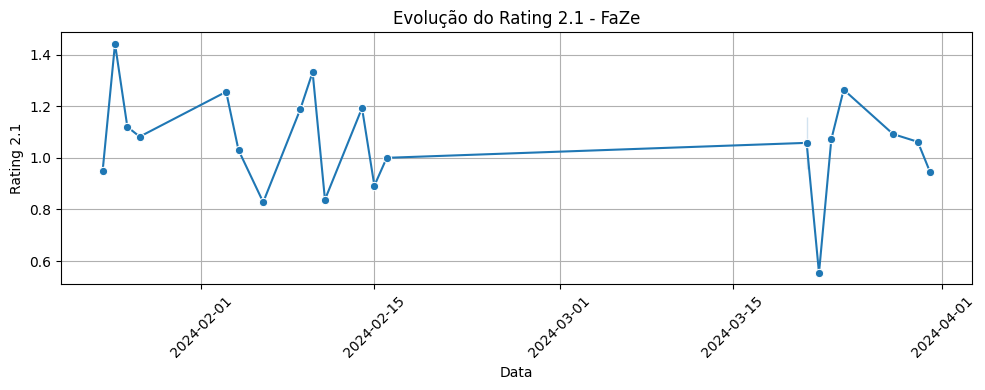

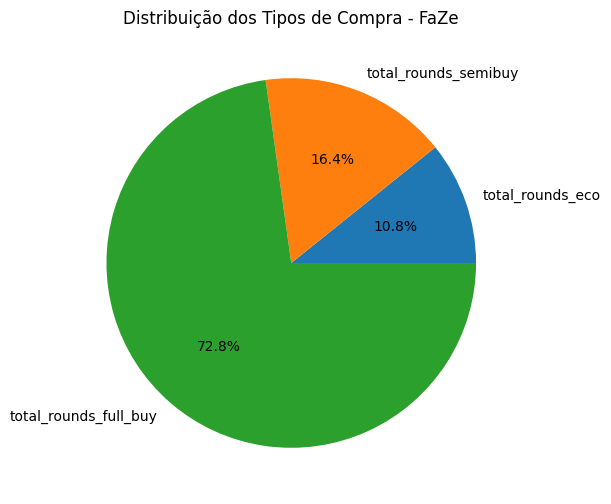

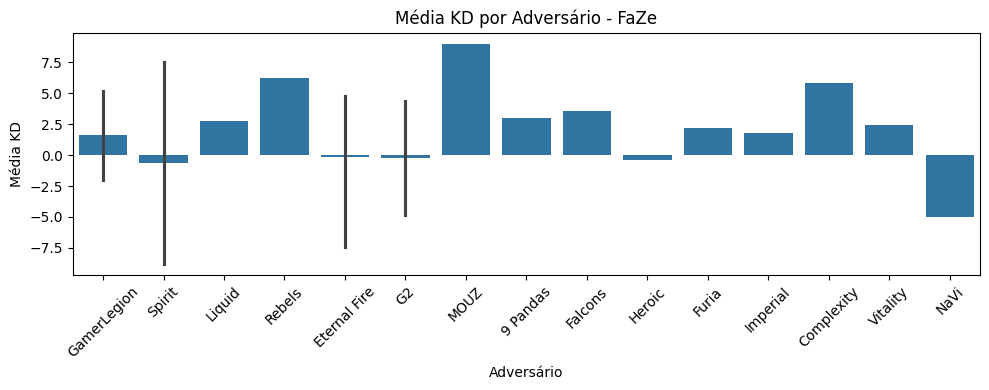

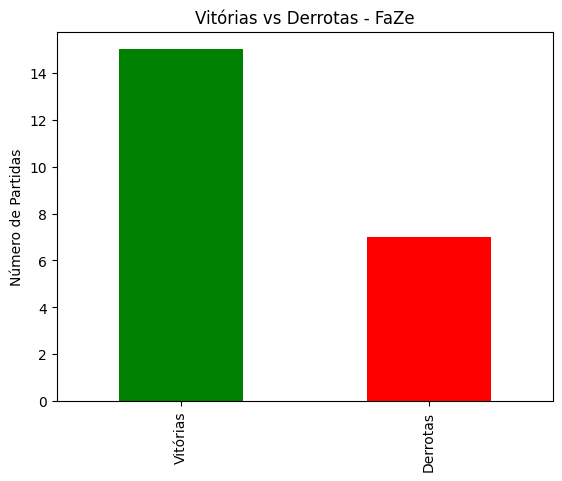

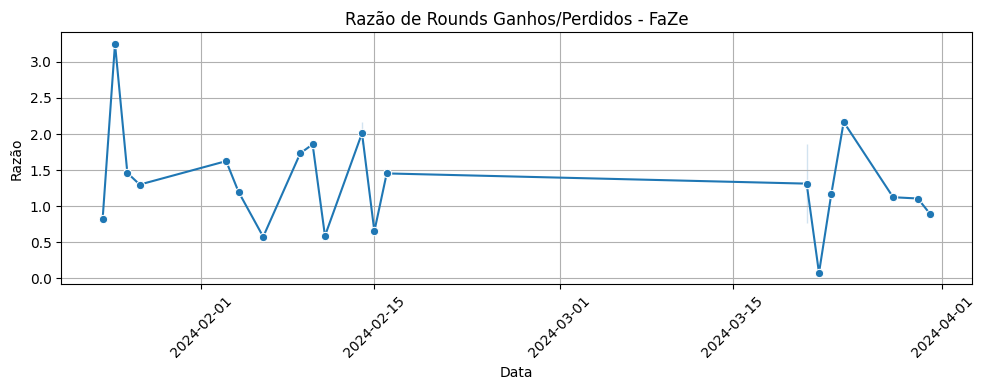

Gráficos de desempenho - NaVi


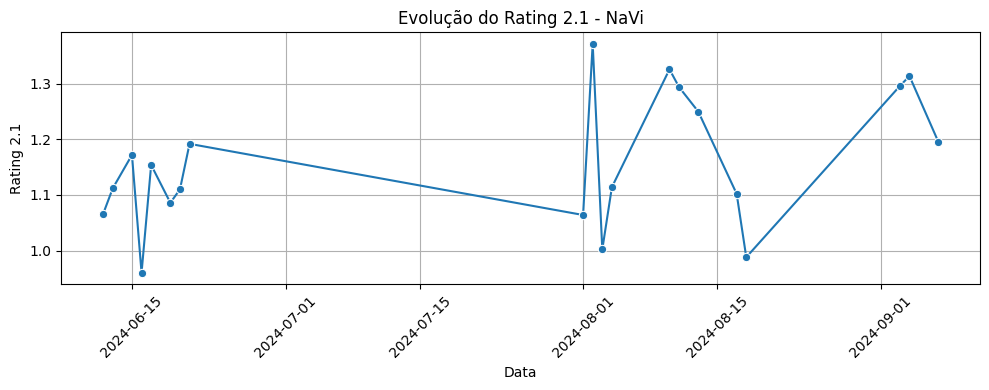

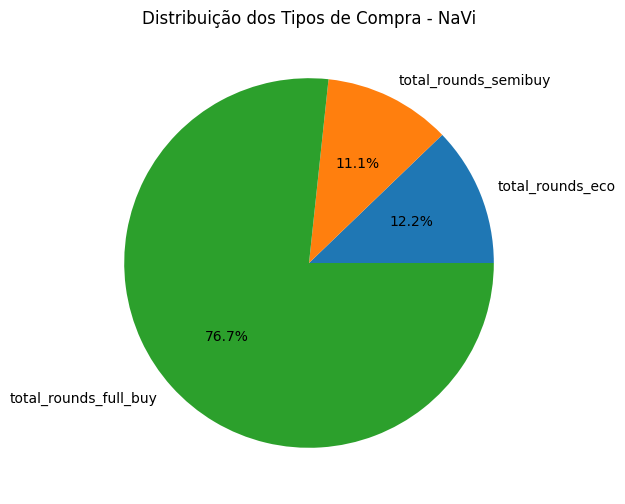

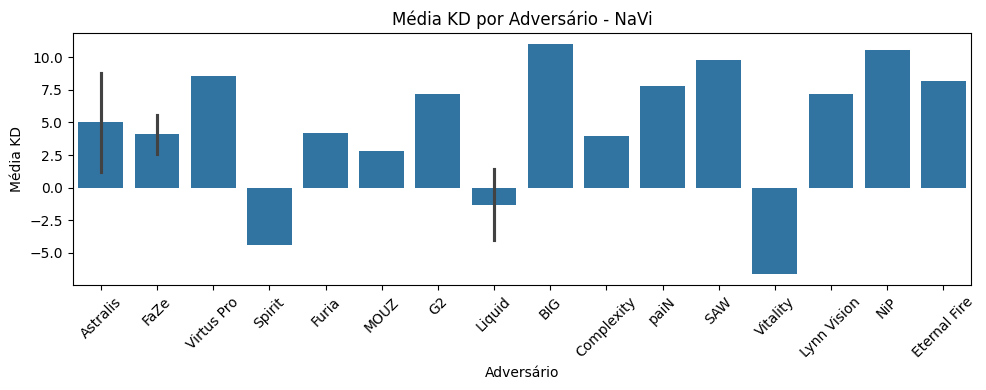

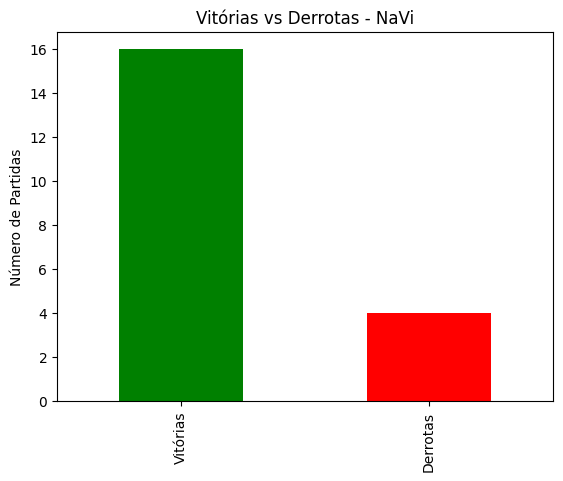

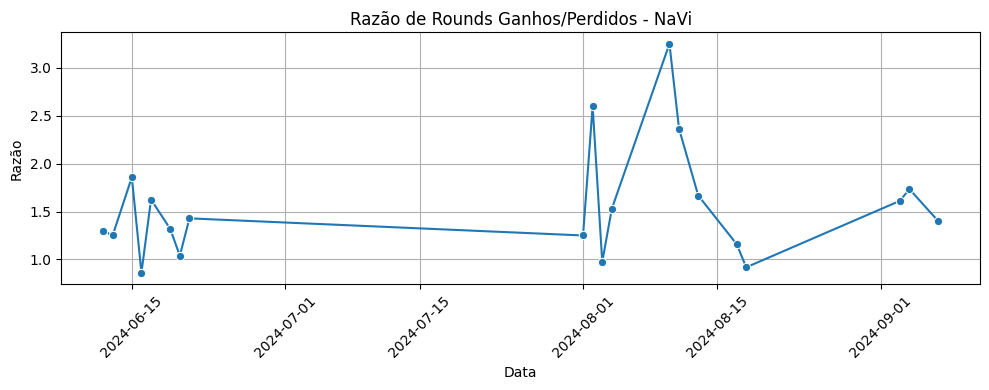

Gráficos de desempenho - Vitality


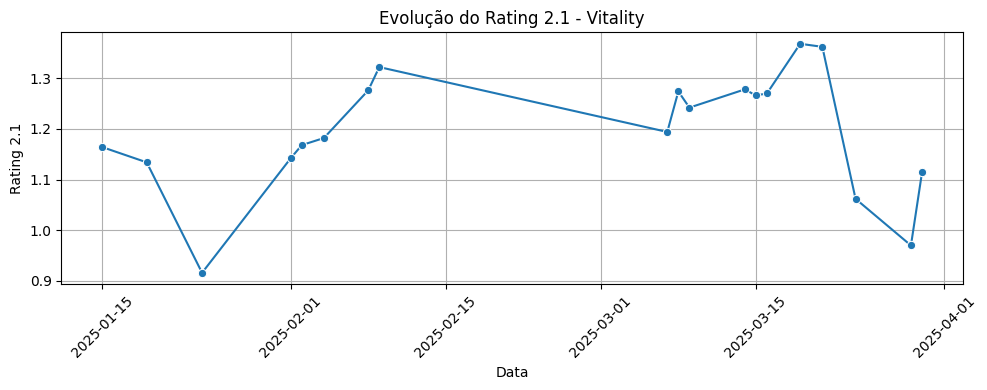

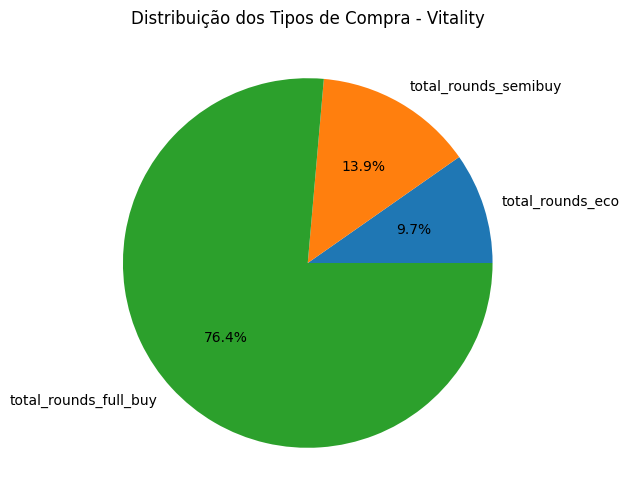

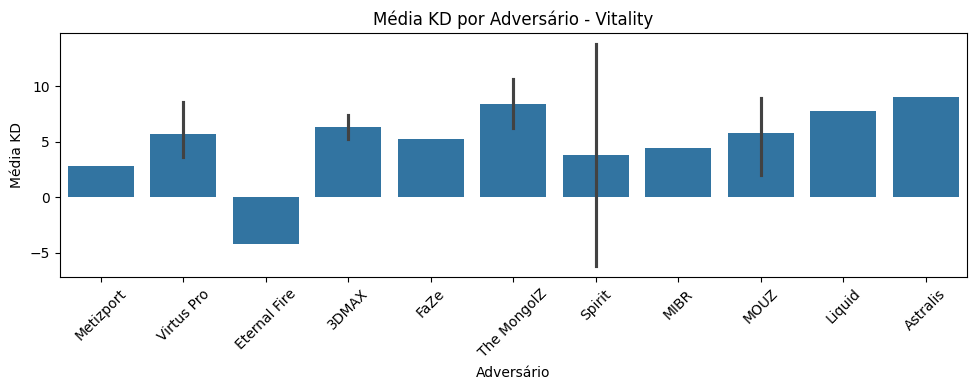

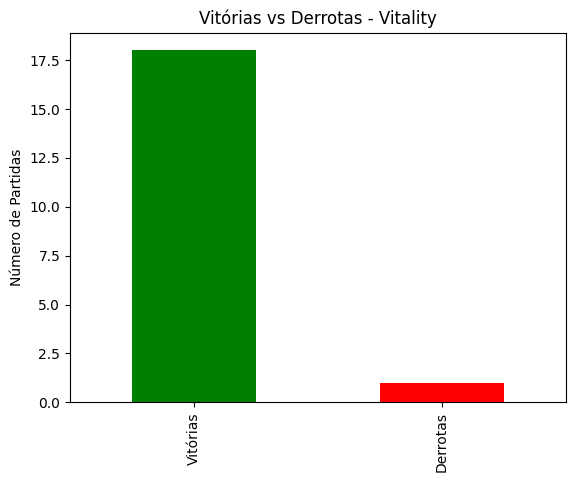

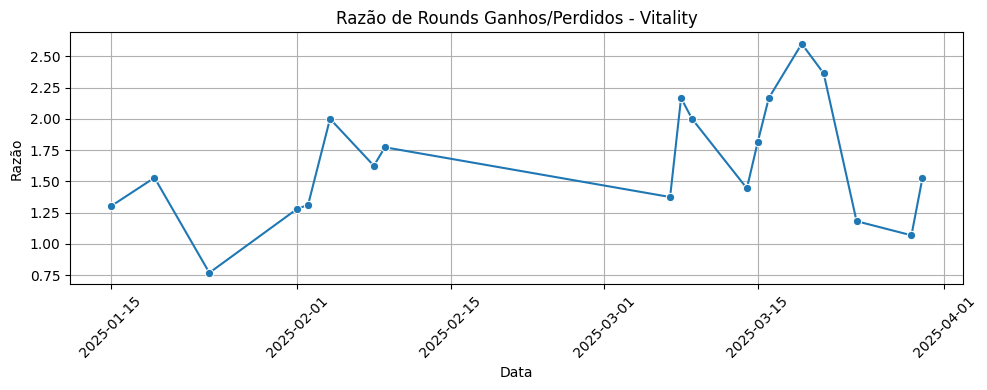

In [3]:
times_para_analisar = ['FaZe', 'NaVi', 'Vitality']
for time in times_para_analisar:
    analisar_time(df, time)

# CORRELAÇÃO

05 - Há relação entre a média de rounds jogados em semibuy e a razão de rounds ganhos?

> Variáveis: qtde rounds semibuy, razão rounds ganhos.

> Objetivo: Avaliar se estratégias intermediárias de compra afetam positivamente o desempenho.

In [24]:
def analisar_relacao_semibuy_razao(df, nome_time):
    time_df = df[df['time'] == nome_time]

    df['total_rounds'] = df['total_rounds_eco'] + df['total_rounds_full_buy'] + df['total_rounds_semibuy']
    df['rounds_ganhos_semibuy'] = (df['total_rounds_semibuy'] / df['total_rounds']) * df['rounds_ganhos']
    df['media_rounds_semibuy'] = df['rounds_ganhos_semibuy'].sum() / df['rounds_ganhos']

    # df['total_rounds'] = df['total_rounds_semibuy'].sum()
    # df['media_rounds_semibuy'] = df['total_rounds'] / len(df['total_rounds'])

    # Calcular correlação
    correlacao = time_df[['media_rounds_semibuy', 'razao_rounds_ganhos_perdidos']].corr().iloc[0, 1]
    print(f'Correlação entre semibuy e razão de rounds para {nome_time}: {correlacao:.2f}')

    # Gráfico de dispersão
    plt.figure(figsize=(10, 6))
    sns.regplot(
        data=time_df,
        x='media_rounds_semibuy',
        y='razao_rounds_ganhos_perdidos',
        scatter_kws={"color": "blue"},
        line_kws={"color": "red"}
    )
    plt.title(f'Relação entre Média de Rounds Semibuy e Razão de Rounds Ganhos - {nome_time}')
    plt.xlabel('Média de Rounds Semibuy')
    plt.ylabel('Razão de Rounds Ganhos/Perdidos')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Correlação entre semibuy e razão de rounds para FaZe: -0.41


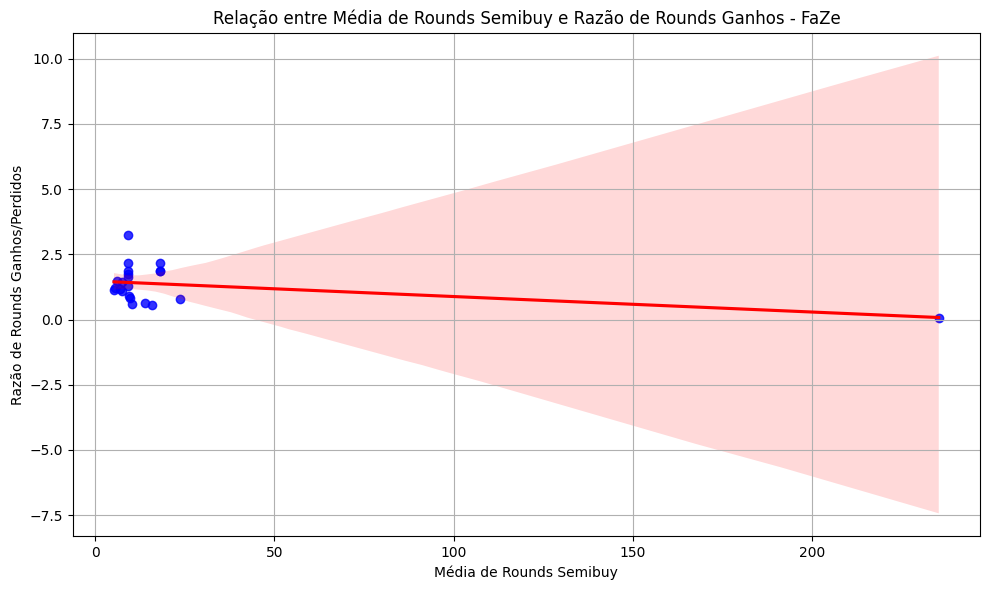

Correlação entre semibuy e razão de rounds para NaVi: 0.57


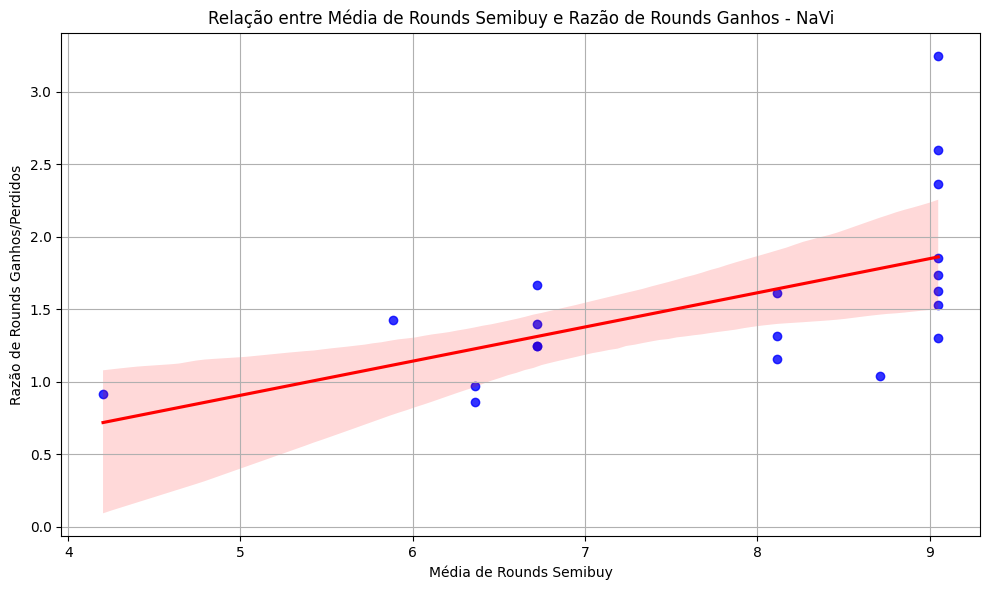

Correlação entre semibuy e razão de rounds para Vitality: -0.07


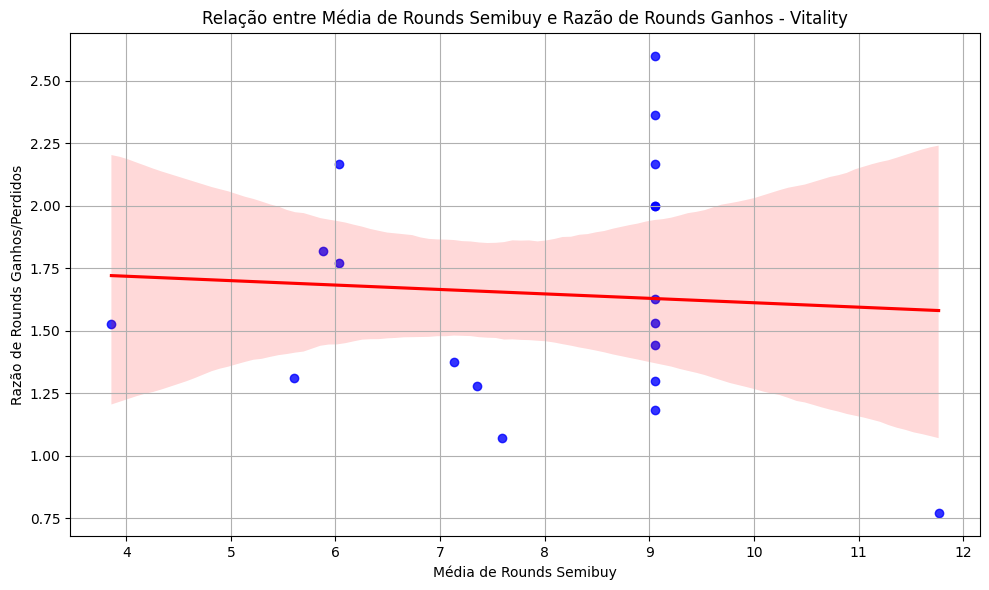

In [40]:
times_para_analisar = ['FaZe', 'NaVi', 'Vitality']
for time in times_para_analisar:
    analisar_relacao_semibuy_razao(df, time)


Os rouds semibuy (que normalmente ocorrem quando o time está em desvantagem econômica) são partes importantes das estratégias dos times de CS2, então, vamos analisar sua correlação com rounds ganhos dos times FaZe, NaVi e Vitality.

FaZe: Correlação = -0.41
A relação entre os rounds jogados em semibuy e os rounds ganhos da FaZe é negativa e pouco dispersa, isso indica que quanto mais eles jogam rounds em semibuy, mais eles tendem a perder estes rounds.

NaVi: Correlação = 0.57
A relação entre os rounds jogados em semibuy e os rounds ganhos da NaVi é positiva e muito dispersa, 

Vitality: Correlação = -0.07
A relação entre os rounds jogados em semibuy e os rounds ganhos da Vitality é levemente negativa e muito dispersa, 

Com base nesta análise, podemos dizer que times que dependem muito de ganhar rounds semibuy, tem uma menor eficiência geral em partidas.

# DISTRIBUIÇÃO DE BERNOULLI

06 - Qual a probabilidade de um time vencer um round quando está em full buy vs. eco?

> Variáveis: rounds full buy, rounds eco, rounds ganhos.

> Objetivo: Modelar a chance de sucesso por tipo de compra (tratando cada round como um ensaio de Bernoulli).

In [15]:
def calcular_probabilidades_por_compra(df, nome_time):
    time_df = df[df['time'] == nome_time]

    df['total_rounds'] = df['total_rounds_eco'] + df['total_rounds_full_buy'] + df['total_rounds_semibuy']
    df['rounds_ganhos_eco'] = (df['total_rounds_eco'] / df['total_rounds']) * df['rounds_ganhos']
    df['rounds_ganhos_full_buy'] = (df['total_rounds_full_buy'] / df['total_rounds']) * df['rounds_ganhos']

    # Somar todos os rounds ganhos e totais por tipo de compra
    total_eco = time_df['total_rounds_eco'].sum()
    ganhos_eco = time_df['rounds_ganhos_eco'].sum()

    total_full = time_df['total_rounds_full_buy'].sum()
    ganhos_full = time_df['rounds_ganhos_full_buy'].sum()

    # Calcular probabilidades
    prob_eco = ganhos_eco / total_eco if total_eco > 0 else 0
    prob_full = ganhos_full / total_full if total_full > 0 else 0

    print(f"\n{nome_time} - Probabilidades de vitória por tipo de compra:")
    print(f"Eco: {prob_eco:.2%} ({ganhos_eco} / {total_eco})")
    print(f"Full Buy: {prob_full:.2%} ({ganhos_full} / {total_full})")

    # Gráfico
    plt.figure(figsize=(8, 6))
    plt.bar(['Eco', 'Full Buy'], [prob_eco, prob_full], color=['gray', 'green'])
    plt.ylim(0, 1)
    plt.ylabel('Probabilidade de Vitória')
    plt.title(f'Probabilidade de Vitória por Tipo de Compra - {nome_time}')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()



FaZe - Probabilidades de vitória por tipo de compra:
Eco: 61.31% (55.79600717036167 / 91)
Full Buy: 63.82% (392.4858062796203 / 615)


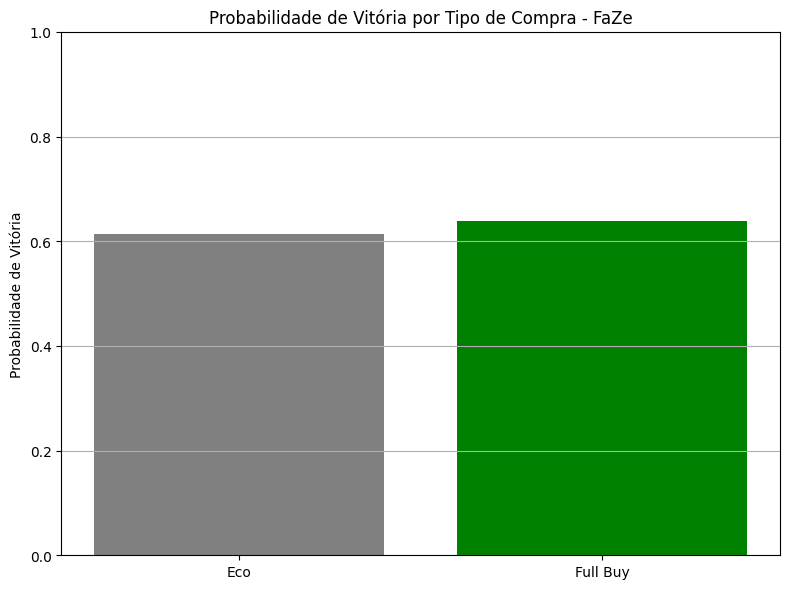


NaVi - Probabilidades de vitória por tipo de compra:
Eco: 67.18% (76.58798694794444 / 114)
Full Buy: 67.76% (485.8112345626502 / 717)


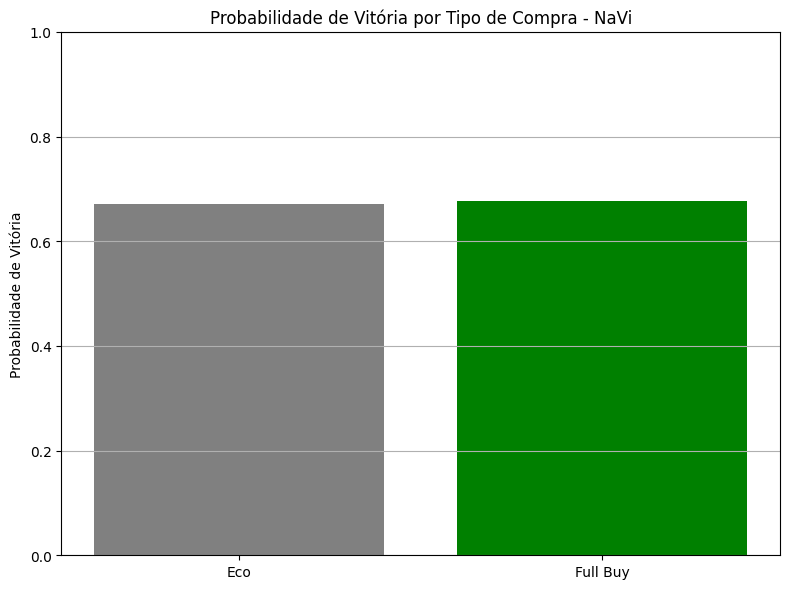


Vitality - Probabilidades de vitória por tipo de compra:
Eco: 68.49% (57.528901971281364 / 84)
Full Buy: 69.31% (457.47108617488635 / 660)


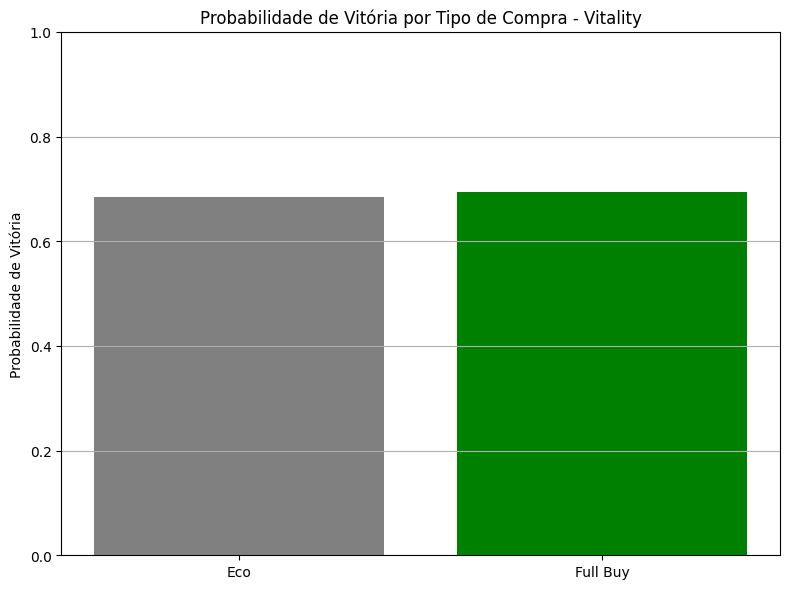

In [17]:
times_para_analisar = ['FaZe', 'NaVi', 'Vitality']
for time in times_para_analisar:
    calcular_probabilidades_por_compra(df, time)
